In [6]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.svm import SVC
beer=pd.read_csv('Consumo_cerveja.csv')
beer=beer.drop('Data',axis=1)
beer.head()

,Temperatura Media (C),Temperatura Minima (C),Temperatura Maxima (C),Precipitacao (mm),Final de Semana,Consumo de cerveja (litros)
0,27.30,23.9,32.5,0.0,0,25.461
1,27.02,24.5,33.5,0.0,0,28.972
2,24.82,22.4,29.9,0.0,1,30.814
3,23.98,21.5,28.6,1.2,1,29.799
4,23.82,21.0,28.3,0.0,0,28.900


In [59]:
target=beer['Final de Semana']
data=beer[['Temperatura Maxima (C)','Temperatura Minima (C)']]

In [60]:
Y=target
X=data
C=1.0
svc=SVC(kernel='rbf',C=1,gamma=100).fit(X,Y)


In [61]:
x_min, x_max = X.iloc[:,0].min()+1 , X.iloc[:, 0].max() + 1
y_min, y_max = X.iloc[:,1].min()+1 , X.iloc[:, 1].max() + 1
h = (x_max / x_min)/100
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),np.arange(y_min, y_max, h))
xx.shape
x_min

15.5

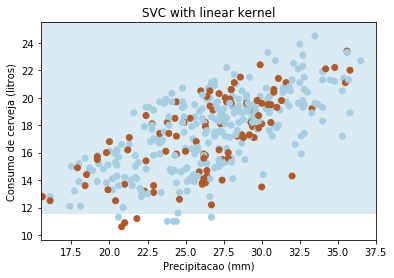

In [62]:
plt.subplot(1, 1, 1)
Z = svc.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.4)
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=Y, cmap=plt.cm.Paired)
plt.xlabel('Precipitacao (mm)')
plt.ylabel('Consumo de cerveja (litros)')
plt.xlim(xx.min(), xx.max())
plt.title('SVC with linear kernel')
plt.show()